In [1]:
# Lasso Regression (Regularization Present-Objective Function includes L1 Norm of coefficients)
import pandas as pd
print(pd.__version__)

0.23.0


In [2]:
# Read data
auto_data = pd.read_csv('C:/Users/chait/Desktop/Machine Learning/Datasets/automobile.csv',quotechar='"')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Mark missing values as NaN (Not a Number) 
import numpy as np
auto_data = auto_data.replace('?',np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Convert columns with numeric values to numeric data type
auto_data['price'] = pd.to_numeric(auto_data['price'],errors='coerce')
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'],errors = 'coerce')

In [5]:
# Drop useless features
auto_data=auto_data.drop('normalized-losses',axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [6]:
# Map categorical data with numeric significance to numeric values
cylinders_dict = {'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'twelve':'12'}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace = True)
auto_data['num-of-cylinders'].head()

0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: object

In [7]:
# Convert remaining categorical data to one-hot encoding form
auto_data = pd.get_dummies(auto_data,columns = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','fuel-system'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Replace rows with missing values
auto_data= auto_data.dropna()
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


In [13]:
# Split Dataset into training and test sets
from sklearn.model_selection import train_test_split
X = auto_data.drop('price',axis=1)
Y = auto_data['price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [54]:
# Select model and train/fit it
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=5, normalize=True)
lasso_model = lasso_model.fit(x_train,y_train)
lasso_model.score(x_train,y_train)


0.9499135446442241

In [55]:
# Predict the labels for test set
y_predict = lasso_model.predict(x_test)

In [56]:
coef = pd.Series(lasso_model.coef_,x_train.columns).sort_values()
print(coef)

engine-location_front    -7.568999e+03
bore                     -2.334014e+03
aspiration_std           -1.333622e+03
engine-type_ohcv         -1.246423e+03
fuel-system_mfi          -1.223864e+03
make_mitsubishi          -1.118122e+03
stroke                   -7.752701e+02
make_plymouth            -7.554759e+02
drive-wheels_fwd         -5.989854e+02
make_nissan              -4.252501e+02
make_peugot              -4.134634e+02
fuel-system_spdi         -2.912262e+02
make_toyota              -2.594971e+02
make_dodge               -2.493885e+02
symboling                -1.211385e+02
engine-type_dohc          0.000000e+00
fuel-type_diesel          0.000000e+00
fuel-type_gas            -0.000000e+00
fuel-system_mpfi          0.000000e+00
fuel-system_idi           0.000000e+00
fuel-system_4bbl          0.000000e+00
fuel-system_2bbl         -0.000000e+00
fuel-system_1bbl         -0.000000e+00
num-of-doors_four         0.000000e+00
num-of-doors_two         -0.000000e+00
body-style_hardtop       

In [57]:
# Evaluate the model using metrics
from sklearn.metrics import r2_score,mean_squared_error
import math
r2=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse= math.sqrt(mse)
print('R2 Score-->',r2,'\nMean Squared Error-->',mse,'\nRoot Mean Squared Error-->',rmse)

R2 Score--> 0.9465360953012363 
Mean Squared Error--> 3794524.076597142 
Root Mean Squared Error--> 1947.9538178809944


Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show(*args, **kw)>

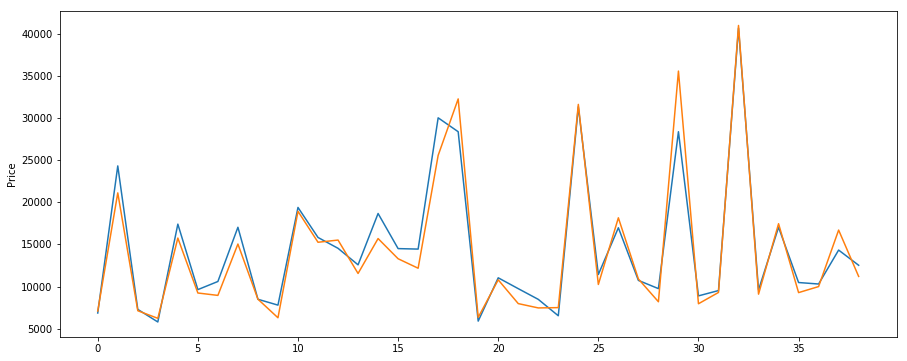

In [59]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(y_predict,label='Predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()